<a href="https://colab.research.google.com/github/SergioManuelJob/ObesityDataset/blob/master/Obesity_Sergio_Manuel_Suarez_Suarez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sergio Manuel Suarez Suarez

### Dataset extracted from here: https://www.kaggle.com/datasets/muhramasaputra/obesity-based-on-eating-habits-and-physical-cond/data

Gender is 1 if a respondent is male and 0 if a respondent is female.

Age is a respondent’s age in years.

family_history_with_overweight is 1 if a respondent has family member who is or was overweight, 0 if not.

FAVC is 1 if a respondent eats high caloric food frequently, 0 if not.

FCVC is 1 if a respondent usually eats vegetables in their meals, 0 if not.

NCP represents how many main meals a respondent has daily (0 for 1-2 meals, 1 for 3 meals, and 2 for more than 3 meals).

CAEC represents how much food a respondent eats between meals on a scale of 0 to 3.

SMOKE is 1 if a respondent smokes, 0 if not.

CH2O represents how much water a respondent drinks on a scale of 0 to 2.

SCC is 1 if a respondent monitors their caloric intake, 0 if not.

FAF represents how much physical activity a respondent does on a scale of 0 to 3.

TUE represents how much time a respondent spends looking at devices with screens on a scale of 0 to 2.

CALC represents how often a respondent drinks alcohol on a scale of 0 to 3.

Automobile, Bike, Motorbike, Public_Transportation, and Walking indicate a respondent’s primary mode of transportation. Their primary mode of transportation is indicated by a 1 and the other columns will contain a 0.

NObeyesdad is a 1 if a patient is obese and a 0 if not.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [73]:
df = pd.read_csv('https://raw.githubusercontent.com/SergioManuelJob/data/master/obesity.csv')
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [74]:
df.describe()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,0.216485,0.003316,0.005211,0.748460,0.026528,0.460445
std,0.500083,6.345968,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.411946,0.057502,0.072015,0.434001,0.160737,0.498551
min,0.000000,14.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,22.777890,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,26.000000,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,61.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

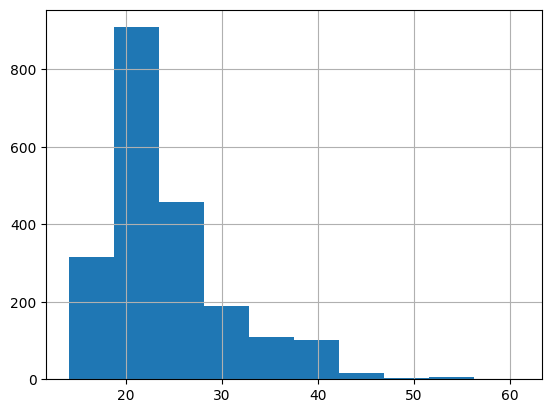

In [75]:
# I'll study the age distribution of this dataset.
df['Age'].hist()

<Axes: >

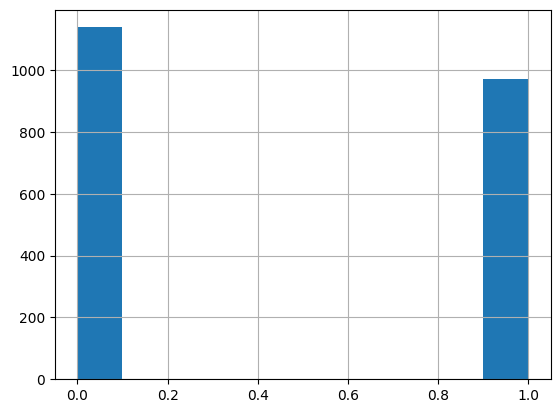

In [76]:
df['NObeyesdad'].hist()

In [77]:
# Ok now that I've seen a bit the dataset, let's see if there are any missing values.
df.isnull().sum()

Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
Automobile                        0
Bike                              0
Motorbike                         0
Public_Transportation             0
Walking                           0
NObeyesdad                        0
dtype: int64

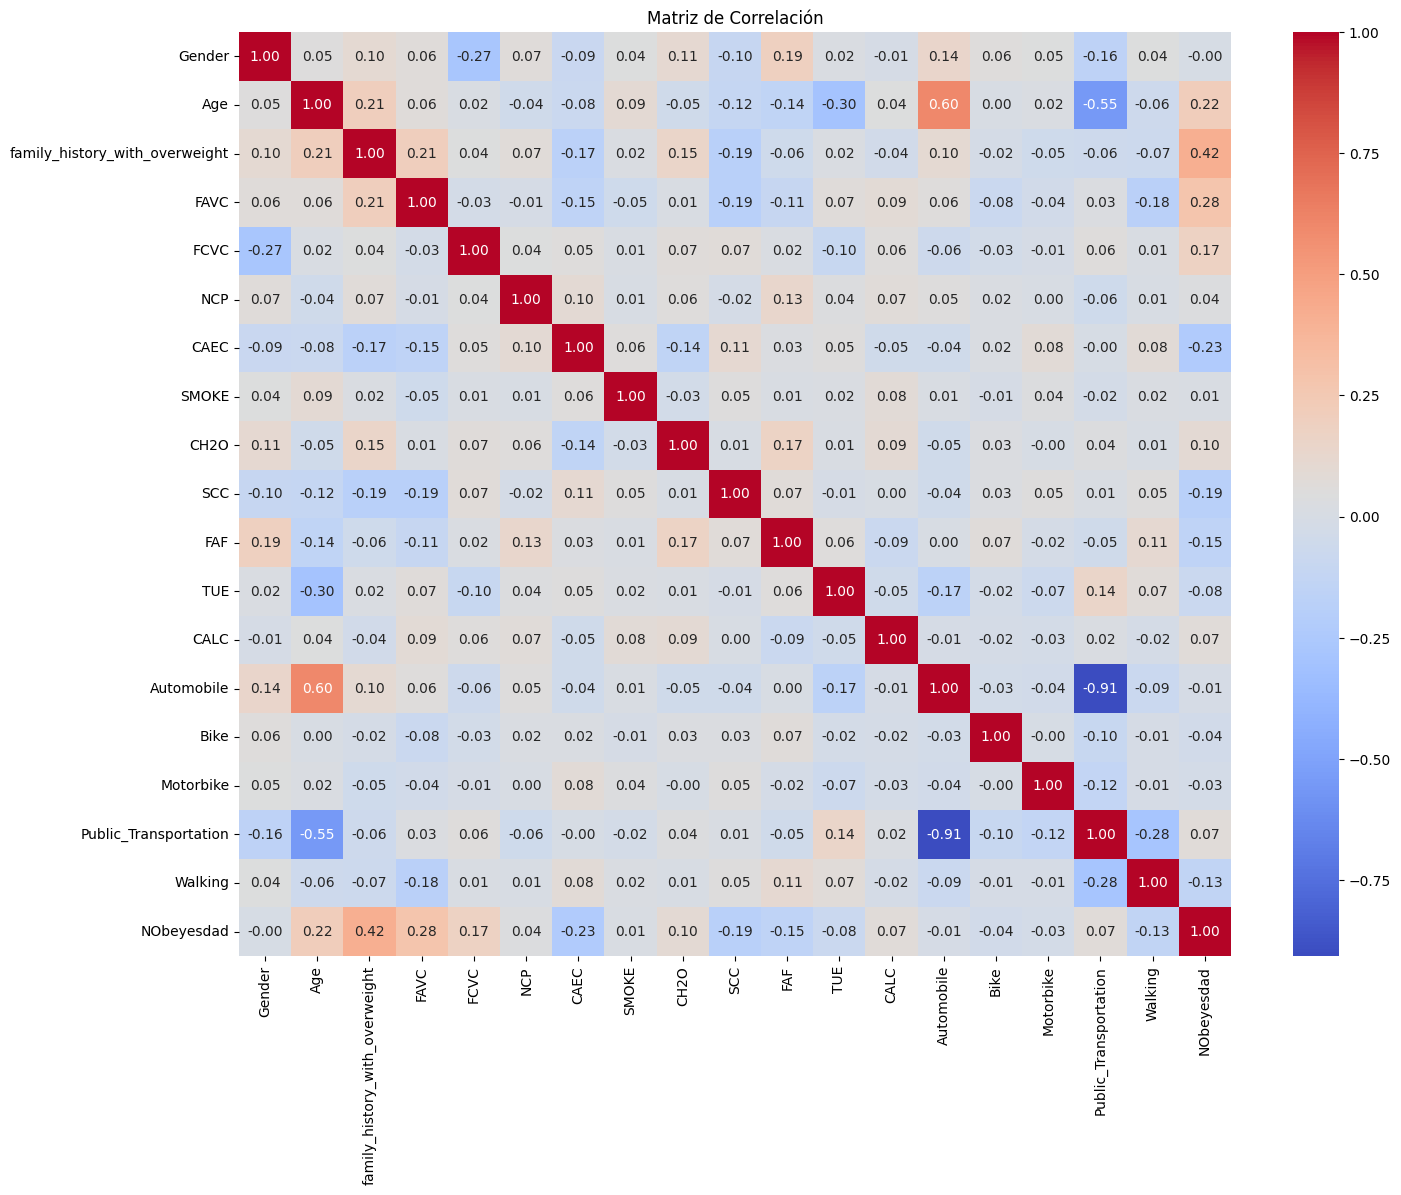

In [78]:
# And now we see how everything is not that heavily correlated
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

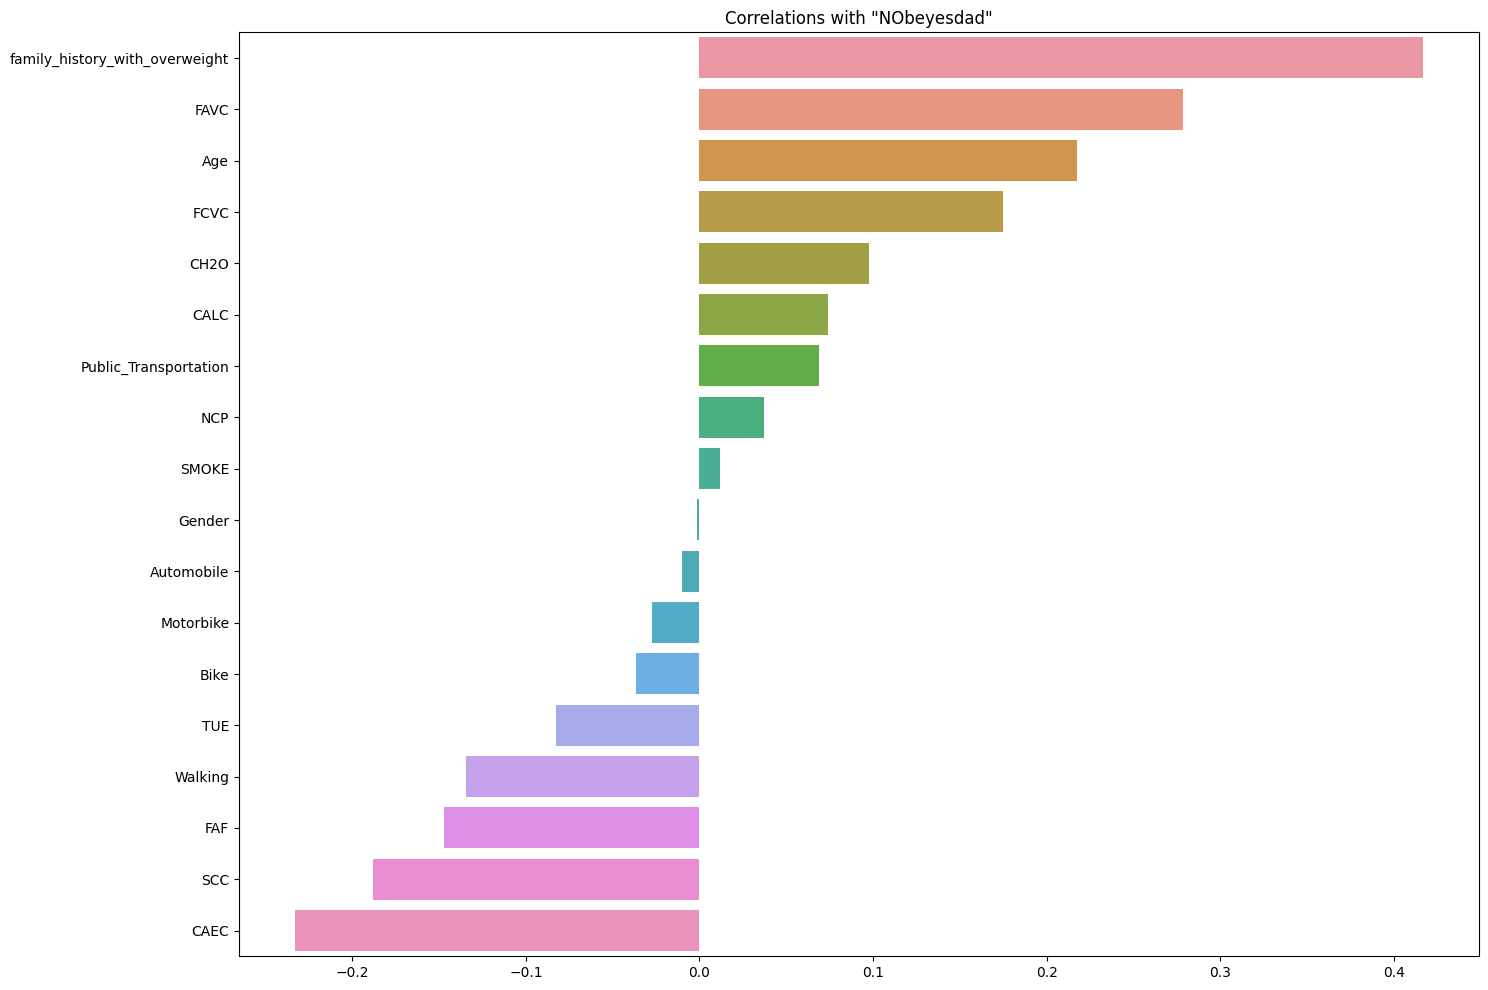

In [82]:
limit = -1.0

data = df.corr()["NObeyesdad"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
plt.figure(figsize=(16, 12))
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "NObeyesdad"')
plt.show()

In [63]:
y = df['NObeyesdad']
df = df.drop(['NObeyesdad'], axis=1)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: NObeyesdad, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'FCVC'),
  Text(1, 0, 'NCP'),
  Text(2, 0, 'CAEC'),
  Text(3, 0, 'CH2O'),
  Text(4, 0, 'FAF'),
  Text(5, 0, 'TUE'),
  Text(6, 0, 'CALC')])

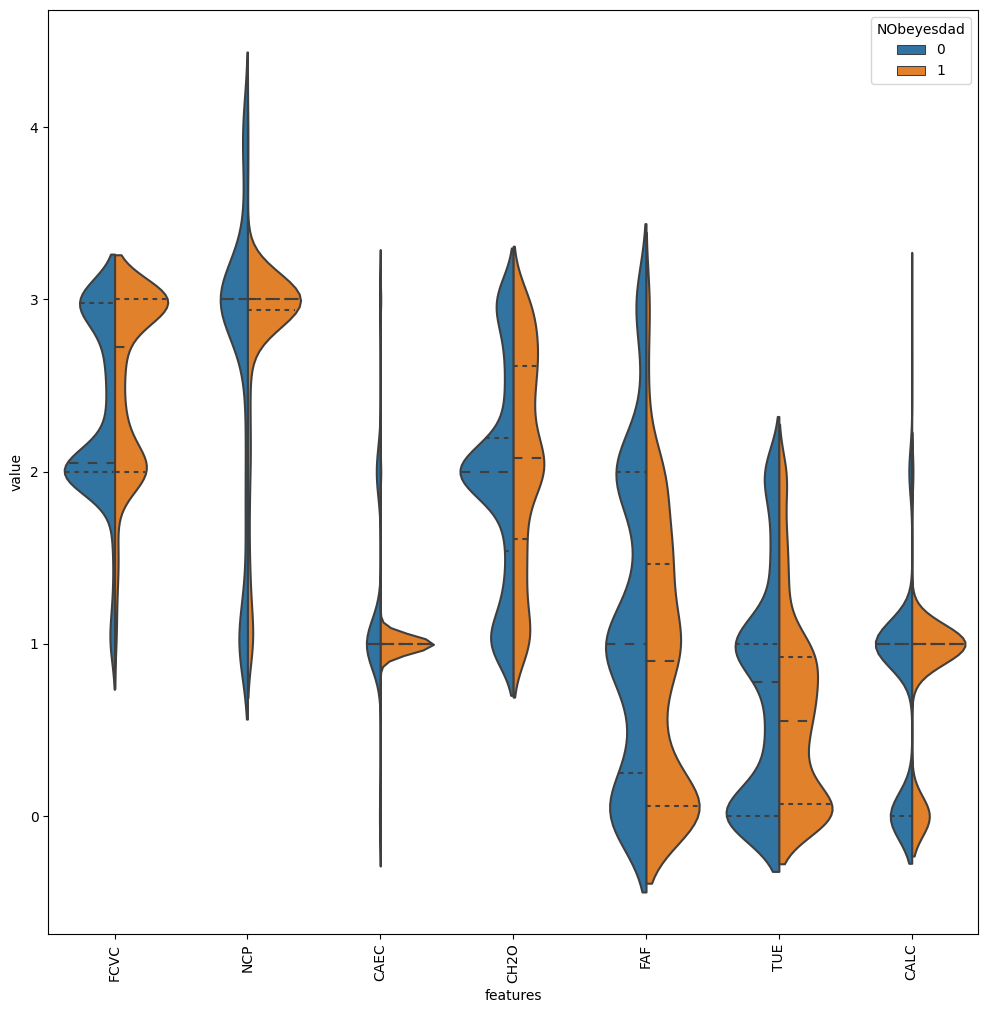

In [64]:
# Let's see how useful all the variables are for classification
selected_columns = ['FCVC',	'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC']
data = df[selected_columns]
data = pd.concat([y,data],axis=1)
data = pd.melt(data,id_vars="NObeyesdad",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(12,12))
sns.violinplot(x="features", y="value", hue="NObeyesdad", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Gender'),
  Text(1, 0, 'FAVC'),
  Text(2, 0, 'SMOKE'),
  Text(3, 0, 'SCC'),
  Text(4, 0, 'Automobile'),
  Text(5, 0, 'Bike'),
  Text(6, 0, 'Motorbike'),
  Text(7, 0, 'Public_Transportation'),
  Text(8, 0, 'Walking'),
  Text(9, 0, 'family_history_with_overweight')])

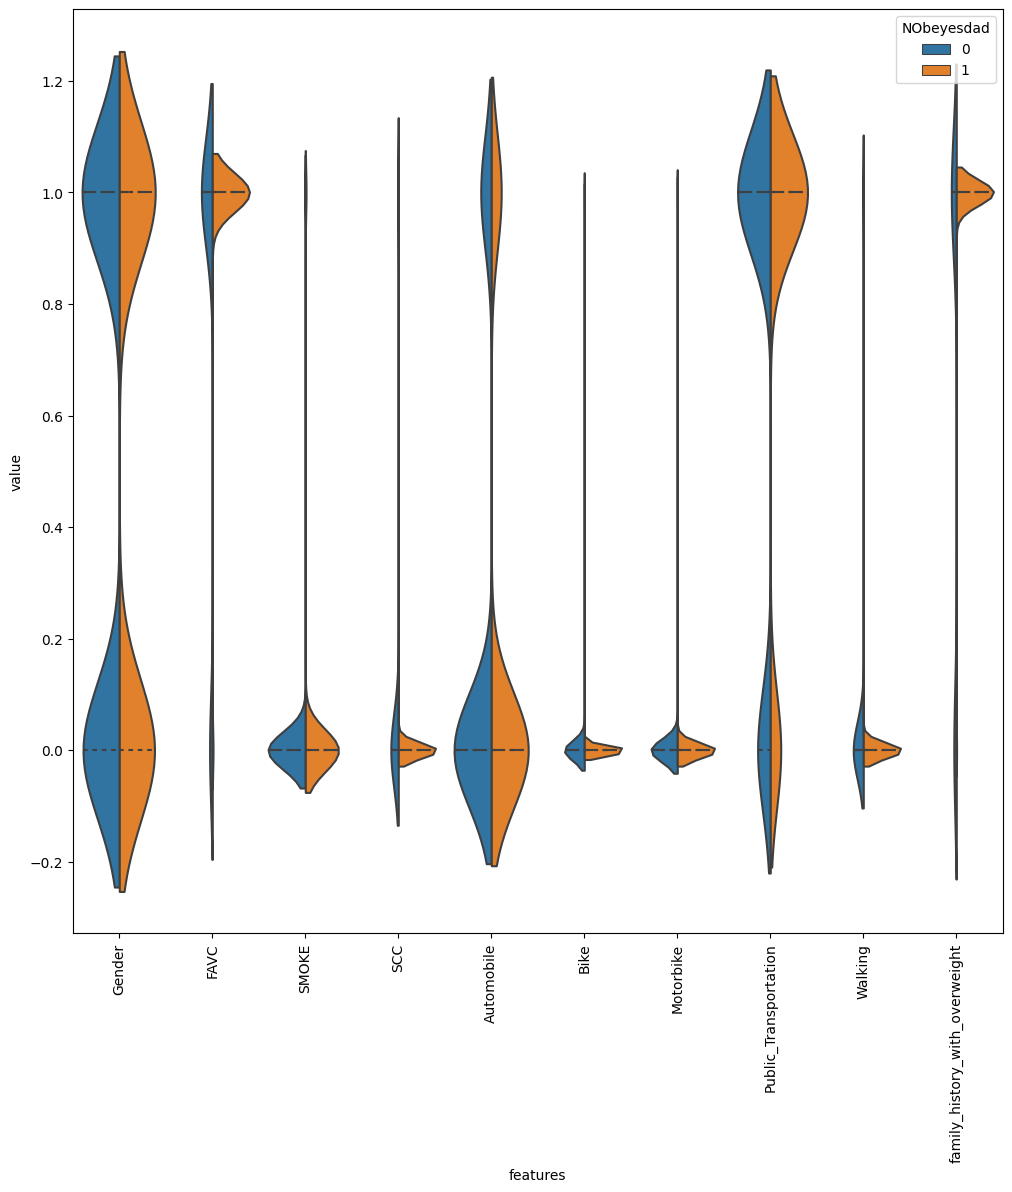

In [65]:
selected_columns = ['Gender', 'FAVC', 'SMOKE', 'SCC', 'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking', 'family_history_with_overweight']
data = df[selected_columns]
data = pd.concat([y,data],axis=1)
data = pd.melt(data,id_vars="NObeyesdad",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(12,12))
sns.violinplot(x="features", y="value", hue="NObeyesdad", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0]), [Text(0, 0, 'Age')])

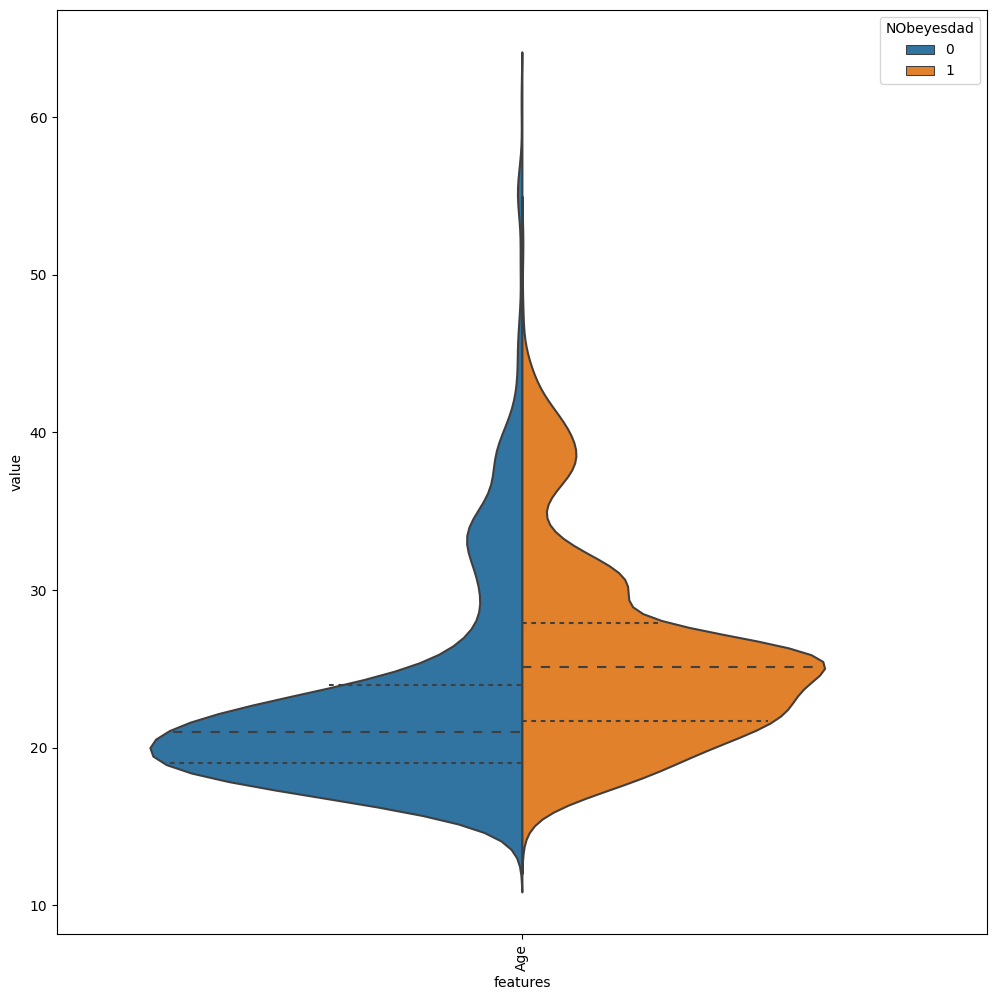

In [66]:
selected_columns = ['Age']
data = df[selected_columns]
data = pd.concat([y,data],axis=1)
data = pd.melt(data,id_vars="NObeyesdad",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(12,12))
sns.violinplot(x="features", y="value", hue="NObeyesdad", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [68]:
x = df
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Precisión del modelo: 0.944794952681388


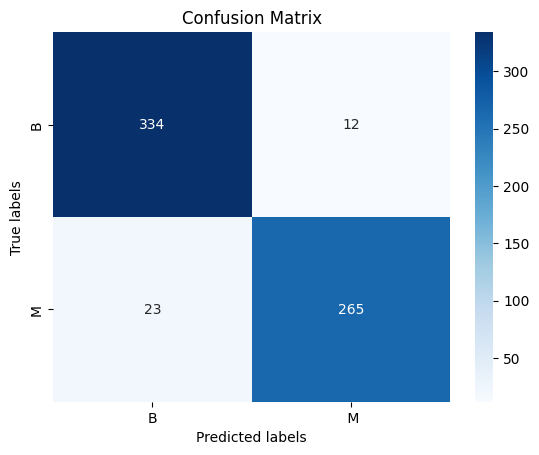

In [70]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=["B", " M"], yticklabels=["B", "M"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()